# **Desafio Frequência e Medidas**

##Integrantes do Squad Grace Hopper:


*   Aline Alvino
*   Bianca Sordi
*   Maitê S. Cuevas
*   Marina Arthur
*   Marina Neves
*   Mayara Reghin
*   Victória Viana
*   Wellen Nascimento





---

##Organização do Squad



1.   Reuniões semanais;
2.   Desenvolvimento do desafio em conjunto;
3.   Definição das 4 integrantes para a apresentação do desafio;
4.   Ensaio da apresentação.




---

## Facilidades e dificuldades encontradas no desenvolvimento do desafio

Facilidades:

*   Construção do código;
*   Insights do time;
*   Compartihamento de idéias no colab.




Dificuldades:

*   Organização;
*   Divisão das atividades;
*   Comunicação;
*   Gestão do tempo.



# Análise exploratória dos dados dos estudantes


Fonte de dados: https://www.kaggle.com/spscientist/students-performance-in-exams


## 1. Leitura da base de dados e análise exploratória inicial da base

In [ ]:
#Importando o pandas
import pandas as pd

In [ ]:
#Importando a base de dados
dados = pd.read_csv('StudentsPerformance.csv')

In [ ]:
#Verificando a quantidade de linhas e colunas da base de dados
print("Numero total de linhas e colunas, respectivamente: \n", dados.shape,"\n")

Numero total de linhas e colunas, respectivamente: 
 (1000, 8) 



In [ ]:
#Mostrando os tipos de variáveis dentro do DataFrame
dados.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
#Analisando os dados no DataFrame
dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2 - Classificação das variáveis

###Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [ ]:
#Analisando os resultados únicos da coluna 'parental level of education'
dados['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [ ]:
#Analisando os resultados únicos da coluna 'gender'
dados['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
#Trocando o nome male por Masculino e female por Feminino
dados.replace('male', 'Masculino', inplace=True)
dados.replace('female', 'Feminino', inplace=True)

In [ ]:
#Analisando os resultados únicos da coluna 'race/ethnicity'
dados['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

Definição dos Grupos de Raça e etnia, segundo o Reino Unido:

Group A - White - British

Group B - White - Irish

Group C - White - Any other White background

Group D - Mixed - White and Black Caribbean

Group E - Mixed - White and Black African

Group F - Mixed - White and Asian

Group G - Mixed - Any other mixed background

Fonte: https://www.datadictionary.nhs.uk/attributes/ethnic_category_code_2001.html

In [ ]:
#Analisando os resultados únicos da coluna 'lunch'
dados['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
#Analisando os resultados únicos da coluna 'test preparation course'
dados['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [ ]:
#Analisando a variação dos valores da coluna 'math score'
print('Notas de matemática variam de %s até %s' % (
    dados['math score'].min(), dados['math score'].max()))

Notas de matemática variam de 0 até 100


In [ ]:
#Analisando a variação dos valores da coluna 'reading score'
print('Notas de leitura variam de %s até %s' % (
    dados['reading score'].min(), dados['reading score'].max()))

Notas de leitura variam de 17 até 100


In [ ]:
#Analisando a variação dos valores da coluna 'writing score'
print('Notas de escrita variam de %s até %s' % (
    dados['writing score'].min(), dados['writing score'].max()))

Notas de escrita variam de 10 até 100


## 3. Verificando a quantidade de alunos em cada grupo racial/étnico.

In [ ]:
#Mostrando quantos alunos(as) há por grupo racial/étnico
dados['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Verificando a quantidade de alunos de cada gênero

In [ ]:
#Quantidade de alunos por gênero
contagem_sexo = dados['gender'].value_counts()
contagem_sexo

Feminino     518
Masculino    482
Name: gender, dtype: int64

In [ ]:
#Verificando qual gênero possui mais alunos
maior_genero = contagem_sexo.idxmax()
print('Existem mais alunos do gênero', maior_genero)

Portanto existem mais alunos do gênero Feminino


### 4.1. Verificando a quantidade de alunos por grau de escolaridade dos pais

In [ ]:
#Mostrando a quantidade de alunos por grau de escolaridade dos pais
dados['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

### 4.2. Verificando a quantidade de alunos por tipo de almoço

In [ ]:
#Mostrando a quantidade de alunos por tipo de almoço
dados['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

### 4.3. Verificando a quantidade de alunos que fizeram ou não curso preparatório

In [ ]:
#Mostrando a quantidade de alunos que possuem ou não curso preparatório
dados['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

##5. Análise das notas de matemática dos alunos

*   A Nota de Matemática (math score) é uma Variável Quantitativa ⤵

In [ ]:
import numpy as np

In [ ]:
#Dataframe com dados de média, mediana, mínimo e máximo em relação as notas de matemática
dados[['math score']].agg(['mean', 'median', 'min', 'max']).round(2)

,math score
mean,66.09
median,66.00
min,0.00
max,100.00


In [ ]:
#Cálculo da média geral das notas de matemática
dados['math score'].mean()

66.089

In [ ]:
#Cálculo da mediana das notas de matemática
dados['math score'].median()

66.0

In [ ]:
#Cálculo da moda das notas de matemática
dados['math score'].mode()

0    65
Name: math score, dtype: int64

In [ ]:
#Cálculo dos QUARTIS das notas de matemática
dados['math score'].quantile([0.25, 0.5, 0.75])

0.25    57.0
0.50    66.0
0.75    77.0
Name: math score, dtype: float64

In [ ]:
#Cálculo dos DECIS das notas de matemática
dados['math score'].quantile([i / 10 for i in range(1, 10)])

0.1    47.0
0.2    53.0
0.3    59.0
0.4    62.0
0.5    66.0
0.6    70.0
0.7    74.0
0.8    79.0
0.9    86.0
Name: math score, dtype: float64

In [ ]:
#Cálculo dos PERCENTIS das notas de matemática
dados['math score'].quantile([i / 100 for i in range(1, 100)])

0.01    27.99
0.02    33.98
0.03    37.00
0.04    39.96
0.05    40.95
        ...  
0.95    90.05
0.96    92.00
0.97    94.00
0.98    96.00
0.99    98.01
Name: math score, Length: 99, dtype: float64

In [ ]:
#Analisando as notas de matemática

#Por etnia
#Soma, média e mediana das notas de matemática
math_race = dados[['math score', 'race/ethnicity' ]].groupby(['race/ethnicity']).agg(['sum','mean', 'median']).round(2)
math_race.columns = ['Total Math Score', 'Mean Math Score', 'Median Math Score']
math_race = math_race.sort_values(by = 'Mean Math Score', ascending = False)

math_race

,Total Math Score,Mean Math Score,Median Math Score
race/ethnicity,,,
group E,10335,73.82,74.5
group D,17649,67.36,69.0
group C,20564,64.46,65.0
group B,12056,63.45,63.0
group A,5485,61.63,61.0


In [ ]:
#Por gênero
#Soma, média e mediana das notas de matemática
math_gender = dados[['math score', 'gender' ]].groupby(['gender']).agg(['sum','mean', 'median']).round(2)
math_gender.columns = ['Total Math Score', 'Mean Math Score', 'Median Math Score']
math_gender = math_gender.sort_values(by = 'Mean Math Score', ascending = False)

math_gender

,Total Math Score,Mean Math Score,Median Math Score
gender,,,
male,33127,68.73,69.0
female,32962,63.63,65.0


In [ ]:
#Por grau de instrução dos pais
#Soma, média e mediana das notas de matemática
math_parental_education = dados[['math score', 'parental level of education' ]].groupby(['parental level of education']).agg(['sum','mean', 'median']).round(2)
math_parental_education.columns = ['Total Math Score', 'Mean Math Score', 'Median Math Score']
math_parental_education = math_parental_education.sort_values(by = 'Mean Math Score', ascending = False)

math_parental_education

,Total Math Score,Mean Math Score,Median Math Score
parental level of education,,,
master's degree,4115,69.75,73.0
bachelor's degree,8188,69.39,68.0
associate's degree,15070,67.88,67.0
some college,15171,67.13,67.5
some high school,11366,63.50,65.0
high school,12179,62.14,63.0


In [ ]:
#Por curso preparatório
#Soma, média e mediana das notas de matemática
math_preparation_course = dados[['math score', 'test preparation course' ]].groupby(['test preparation course']).agg(['sum','mean', 'median']).round(2)
math_preparation_course.columns = ['Total Math Score', 'Mean Math Score', 'Median Math Score']
math_preparation_course = math_preparation_course.sort_values(by = 'Mean Math Score', ascending = False)

math_preparation_course

,Total Math Score,Mean Math Score,Median Math Score
test preparation course,,,
completed,24951,69.70,69.0
none,41138,64.08,64.0


In [ ]:
#Por tipo de almoço
#Soma, média e mediana das notas de matemática
math_lunch = dados[['math score', 'lunch' ]].groupby(['lunch']).agg(['sum','mean', 'median']).round(2)
math_lunch.columns = ['Total Math Score', 'Mean Math Score', 'Median Math Score']
math_lunch = math_lunch.sort_values(by = 'Mean Math Score', ascending = False)

math_lunch

,Total Math Score,Mean Math Score,Median Math Score
lunch,,,
standard,45172,70.03,69.0
free/reduced,20917,58.92,60.0


##6. Análise das notas de leitura dos alunos

In [ ]:
#Dataframe com dados de média, mediana, mínimo e máximo em relação as notas de leitura
dados[['reading score']].agg(['mean', 'median', 'min', 'max']).round(2)

,reading score
mean,69.17
median,70.00
min,17.00
max,100.00


In [ ]:
#Cálculo da média geral das notas de leitura
dados['reading score'].mean()

69.169

In [ ]:
#Cálculo da mediana das notas de leitura
dados['reading score'].median()

70.0

In [ ]:
#Cálculo da moda das notas de leitura
dados['reading score'].mode()

0    72
Name: reading score, dtype: int64

In [ ]:
#Cálculo dos QUARTIS das notas de leitura
dados['reading score'].quantile([0.25, 0.5, 0.75])

0.25    59.0
0.50    70.0
0.75    79.0
Name: reading score, dtype: float64

In [ ]:
#Cálculo dos DECIS das notas de leitura
dados['reading score'].quantile([i / 10 for i in range(1, 10)])

0.1    51.0
0.2    57.0
0.3    62.0
0.4    66.0
0.5    70.0
0.6    74.0
0.7    77.0
0.8    82.0
0.9    87.1
Name: reading score, dtype: float64

In [ ]:
#Cálculo dos PERCENTIS das notas de leitura
dados['reading score'].quantile([i / 100 for i in range(1, 100)])

0.01     31.99
0.02     38.98
0.03     41.00
0.04     42.96
0.05     44.00
         ...  
0.95     92.00
0.96     93.04
0.97     95.00
0.98     97.04
0.99    100.00
Name: reading score, Length: 99, dtype: float64

In [ ]:
#Analisando as notas de leitura

#Por etnia
#Soma, média e mediana das notas de leitura
reading_race = dados[['reading score', 'race/ethnicity' ]].groupby(['race/ethnicity']).agg(['sum','mean', 'median']).round(2)
reading_race.columns = ['Total Reading Score', 'Mean Reading Score', 'Median Reading Score']
reading_race = reading_race.sort_values(by = 'Mean Reading Score', ascending = False)

reading_race

,Total Reading Score,Mean Reading Score,Median Reading Score
race/ethnicity,,,
group E,10224,73.03,74.0
group D,18348,70.03,71.0
group C,22044,69.10,71.0
group B,12797,67.35,67.0
group A,5756,64.67,64.0


In [ ]:
#Por gênero
#Soma, média e mediana das notas de leitura
reading_gender = dados[['reading score', 'gender' ]].groupby(['gender']).agg(['sum','mean', 'median']).round(2)
reading_gender.columns = ['Total Reading Score', 'Mean Reading Score', 'Median Reading Score']
reading_gender = reading_gender.sort_values(by = 'Mean Reading Score', ascending = False)

reading_gender

,Total Reading Score,Mean Reading Score,Median Reading Score
gender,,,
female,37611,72.61,73.0
male,31558,65.47,66.0


In [ ]:
#Por grau de instrução dos pais
#Soma, média e mediana das notas de leitura
reading_parental_education = dados[['reading score', 'parental level of education' ]].groupby(['parental level of education']).agg(['sum','mean', 'median']).round(2)
reading_parental_education.columns = ['Total Reading Score', 'Mean Reading Score', 'Median Reading Score']
reading_parental_education = reading_parental_education.sort_values(by = 'Mean Reading Score', ascending = False)

reading_parental_education

,Total Reading Score,Mean Reading Score,Median Reading Score
parental level of education,,,
master's degree,4447,75.37,76.0
bachelor's degree,8614,73.00,73.0
associate's degree,15746,70.93,72.5
some college,15698,69.46,70.5
some high school,11982,66.94,67.0
high school,12682,64.70,66.0


In [ ]:
#Por curso preparatório
#Soma, média e mediana das notas de leitura
reading_preparation_course = dados[['reading score', 'test preparation course' ]].groupby(['test preparation course']).agg(['sum','mean', 'median']).round(2)
reading_preparation_course.columns = ['Total Reading Score', 'Mean Reading Score', 'Median Reading Score']
reading_preparation_course = reading_preparation_course.sort_values(by = 'Mean Reading Score', ascending = False)

reading_preparation_course

,Total Reading Score,Mean Reading Score,Median Reading Score
test preparation course,,,
completed,26454,73.89,75.0
none,42715,66.53,67.0


In [ ]:
#Por tipo de almoço
#Soma, média e mediana das notas de leitura
reading_lunch = dados[['reading score', 'lunch' ]].groupby(['lunch']).agg(['sum','mean', 'median']).round(2)
reading_lunch.columns = ['Total Reading Score', 'Mean Reading Score', 'Median Reading Score']
reading_lunch = reading_lunch.sort_values(by = 'Mean Reading Score', ascending = False)

reading_lunch

,Total Reading Score,Mean Reading Score,Median Reading Score
lunch,,,
standard,46217,71.65,72.0
free/reduced,22952,64.65,65.0


## 7. Análise as notas de escrita dos alunos

In [ ]:
#Dataframe com dados de média, mediana, mínimo e máximo em relação as notas de escrita
dados[['writing score']].agg(['mean', 'median', 'min', 'max']).round(2)

,writing score
mean,68.05
median,69.00
min,10.00
max,100.00


In [ ]:
#Cálculo da média geral das notas de escrita
dados['writing score'].mean()

68.054

In [ ]:
#Cálculo da mediana das notas de escrita
dados['writing score'].median()

69.0

In [ ]:
#Cálculo da moda das notas de escrita
dados['writing score'].mode()

0    74
Name: writing score, dtype: int64

In [ ]:
#Cálculo dos QUARTIS das notas de escrita
dados['writing score'].quantile([0.25, 0.5, 0.75])

0.25    57.75
0.50    69.00
0.75    79.00
Name: writing score, dtype: float64

In [ ]:
#Cálculo dos DECIS das notas de escrita
dados['writing score'].quantile([i / 10 for i in range(1, 10)])

0.1    48.0
0.2    54.0
0.3    60.0
0.4    65.0
0.5    69.0
0.6    73.0
0.7    77.0
0.8    81.0
0.9    87.0
Name: writing score, dtype: float64

In [ ]:
#Cálculo dos PERCENTIS das notas de escrita
dados['writing score'].quantile([i / 100 for i in range(1, 100)])

0.01     31.98
0.02     36.00
0.03     38.97
0.04     41.00
0.05     42.95
         ...  
0.95     92.00
0.96     93.04
0.97     95.00
0.98     97.02
0.99    100.00
Name: writing score, Length: 99, dtype: float64

In [ ]:
#Analisando as notas de escrita

#Por etnia
#Soma, média e mediana das notas de escrita
writing_race = dados[['writing score', 'race/ethnicity' ]].groupby(['race/ethnicity']).agg(['sum','mean', 'median']).round(2)
writing_race.columns = ['Total Writing Score', 'Mean Writing Score', 'Median Writing Score']
writing_race = writing_race.sort_values(by = 'Mean Writing Score', ascending = False)

writing_race

,Total Writing Score,Mean Writing Score,Median Writing Score
race/ethnicity,,,
group E,9997,71.41,72.0
group D,18378,70.15,72.0
group C,21637,67.83,68.0
group B,12464,65.60,67.0
group A,5578,62.67,62.0


In [ ]:
#Por gênero
#Soma, média e mediana das notas de escrita
writing_gender = dados[['writing score', 'gender' ]].groupby(['gender']).agg(['sum','mean', 'median']).round(2)
writing_gender.columns = ['Total Writing Score', 'Mean Writing Score', 'Median Writing Score']
writing_gender = writing_gender.sort_values(by = 'Mean Writing Score', ascending = False)

writing_gender

,Total Writing Score,Mean Writing Score,Median Writing Score
gender,,,
female,37538,72.47,74.0
male,30516,63.31,64.0


In [ ]:
#Por grau de instrução dos pais
#Soma, média e mediana das notas de escrita
writing_parental_education = dados[['writing score', 'parental level of education' ]].groupby(['parental level of education']).agg(['sum','mean', 'median']).round(2)
writing_parental_education.columns = ['Total Writing Score', 'Mean Writing Score', 'Median Writing Score']
writing_parental_education = writing_parental_education.sort_values(by = 'Mean Writing Score', ascending = False)

writing_parental_education

,Total Writing Score,Mean Writing Score,Median Writing Score
parental level of education,,,
master's degree,4465,75.68,75.0
bachelor's degree,8659,73.38,74.0
associate's degree,15517,69.90,70.5
some college,15558,68.84,70.0
some high school,11615,64.89,66.0
high school,12240,62.45,64.0


In [ ]:
#Por curso preparatório
#Soma, média e mediana das notas de escrita
writing_preparation_course = dados[['writing score', 'test preparation course' ]].groupby(['test preparation course']).agg(['sum','mean', 'median']).round(2)
writing_preparation_course.columns = ['Total Writing Score', 'Mean Writing Score', 'Median Writing Score']
writing_preparation_course = writing_preparation_course.sort_values(by = 'Mean Writing Score', ascending = False)

writing_preparation_course

,Total Writing Score,Mean Writing Score,Median Writing Score
test preparation course,,,
completed,26642,74.42,76.0
none,41412,64.50,65.0


In [ ]:
#Por tipo de almoço
#Soma, média e mediana das notas de escrita
writing_lunch = dados[['writing score', 'lunch' ]].groupby(['lunch']).agg(['sum','mean', 'median']).round(2)
writing_lunch.columns = ['Total Writing Score', 'Mean Writing Score', 'Median Writing Score']
writing_lunch = writing_lunch.sort_values(by = 'Mean Writing Score', ascending = False)

writing_lunch

,Total Writing Score,Mean Writing Score,Median Writing Score
lunch,,,
standard,45681,70.82,72.0
free/reduced,22373,63.02,64.0


# Análises Gráficas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais?

In [ ]:
#agrupando a soma e a média das notas de matemática pelo grau de escolaridade dos pais
math_parental_education = dados[['math score', 'parental level of education' ]].groupby(['parental level of education']).agg(['sum','mean'])
#renomeando as colunas
math_parental_education.columns = ['Total Math Score', 'Mean Math Score']
#colocando em ordem crescente pelo total das notas
math_parental_education = math_parental_education.sort_values(by = 'Total Math Score', ascending = False)

math_parental_education

,Total Math Score,Mean Math Score
parental level of education,,
some college,15171,67.128319
associate's degree,15070,67.882883
high school,12179,62.137755
some high school,11366,63.497207
bachelor's degree,8188,69.389831
master's degree,4115,69.745763


Qual a nota média de leitura dos alunos segundo o grau de escolaridade dos pais?

In [ ]:
#agrupando a soma e a média das notas de leitura pelo grau de escolaridade dos pais
reading_parental_education = dados[['reading score', 'parental level of education' ]].groupby(['parental level of education']).agg(['sum','mean'])
#renomeando as colunas
reading_parental_education.columns = ['Total reading Score', 'Mean reading Score']
#colocando em ordem crescente pelo total das notas
reading_parental_education = reading_parental_education.sort_values(by = 'Total reading Score', ascending = False)

reading_parental_education

,Total reading Score,Mean reading Score
parental level of education,,
associate's degree,15746,70.927928
some college,15698,69.460177
high school,12682,64.704082
some high school,11982,66.938547
bachelor's degree,8614,73.000000
master's degree,4447,75.372881


Qual a nota média de escrita dos alunos segundo o grau de escolaridade dos pais?

In [ ]:
#agrupando a soma e a média das notas de escrita pelo grau de escolaridade dos pais
writing_parental_education = dados[['writing score', 'parental level of education' ]].groupby(['parental level of education']).agg(['sum','mean'])
#renomeando as colunas
writing_parental_education.columns = ['Total writing Score', 'Mean writing Score']
#colocando em ordem crescente pelo total das notas
writing_parental_education = writing_parental_education.sort_values(by = 'Total writing Score', ascending = False)

writing_parental_education

,Total writing Score,Mean writing Score
parental level of education,,
some college,15558,68.840708
associate's degree,15517,69.896396
high school,12240,62.448980
some high school,11615,64.888268
bachelor's degree,8659,73.381356
master's degree,4465,75.677966


Verificando gráficamente a relação da nota de leitura e de escrita

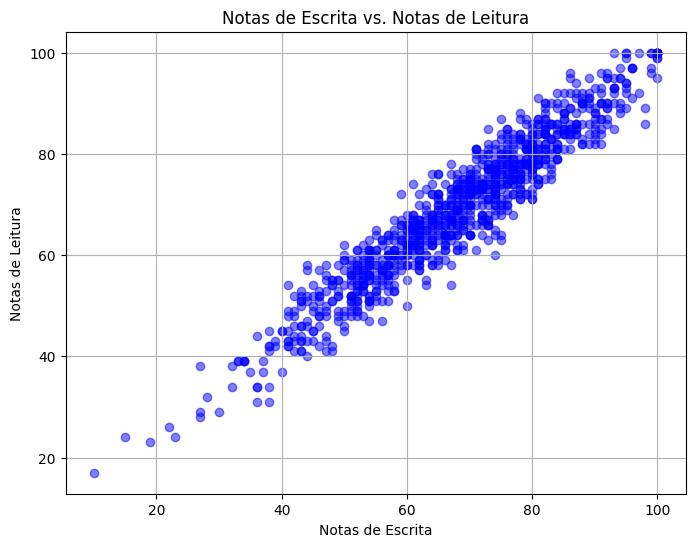

In [ ]:
#Configurando o tamanho da figura do gráfico
plt.figure(figsize=(8, 6))
#criando o gráfico de dispersão
plt.scatter(dados['writing score'], dados['reading score'], c='blue', marker='o', alpha=0.5)
#Configurando o título do gráfico
plt.title('Notas de Escrita vs. Notas de Leitura')
#Configurando o rótulo do eixo x
plt.xlabel('Notas de Escrita')
#Configurando o rótulo do eixo y
plt.ylabel('Notas de Leitura')
#Adicionando uma grade o gráfico
plt.grid(True)
#Exibindo o gráfico
plt.show()


Verificando gráficamente a relação da nota de escrita e de matemática

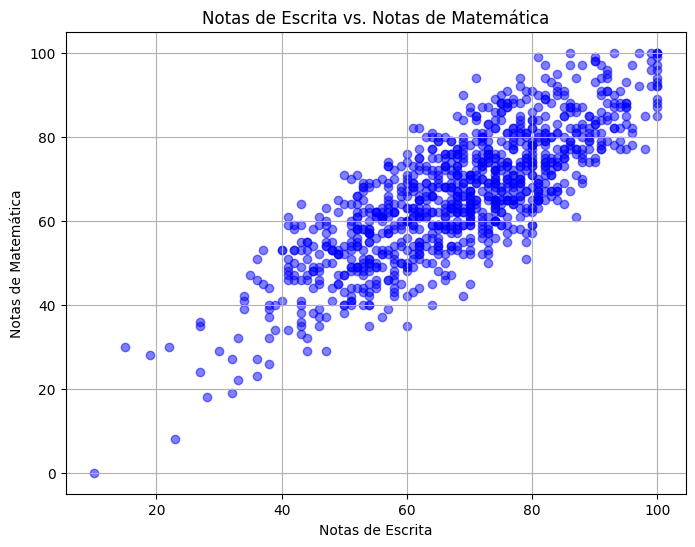

In [ ]:
#Configurando o tamanho da figura do gráfico
plt.figure(figsize=(8, 6))
#criando o gráfico de dispersão
plt.scatter(x = dados['writing score'], y = dados['math score'], c='blue', marker='o', alpha=0.5)
#Configurando o título do gráfico
plt.title('Notas de Escrita vs. Notas de Matemática')
#Configurando o rótulo do eixo x
plt.xlabel('Notas de Escrita')
#Configurando o rótulo do eixo y
plt.ylabel('Notas de Matemática')
#Adicionando uma grade o gráfico
plt.grid(True)
#Exibindo o gráfico
plt.show()

Verificando gráficamente a relação da nota de leitura e de matemática

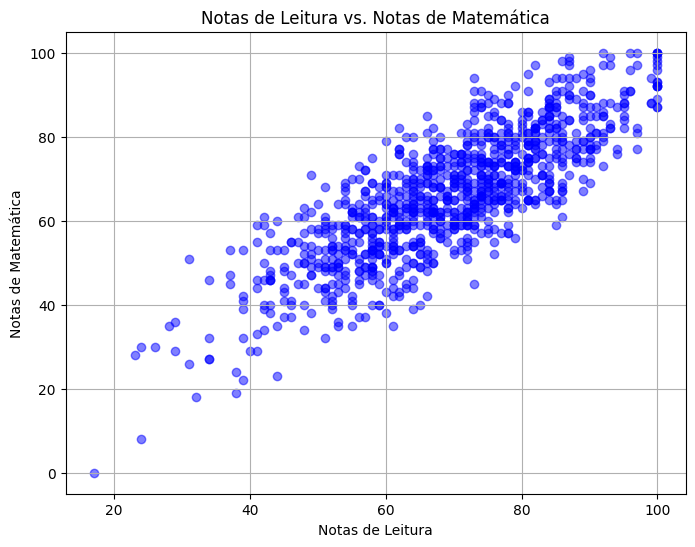

In [ ]:
#Configurando o tamanho da figura do gráfico
plt.figure(figsize=(8, 6))
#criando o gráfico de dispersão
plt.scatter(x = dados['reading score'], y = dados['math score'], c='blue', marker='o', alpha=0.5)
#Configurando o título do gráfico
plt.title('Notas de Leitura vs. Notas de Matemática')
#Configurando o rótulo do eixo x
plt.xlabel('Notas de Leitura')
#Configurando o rótulo do eixo y
plt.ylabel('Notas de Matemática')
#Adicionando uma grade o gráfico
plt.grid(True)
#Exibindo o gráfico
plt.show()

Distribição da frequência das notas de escrita

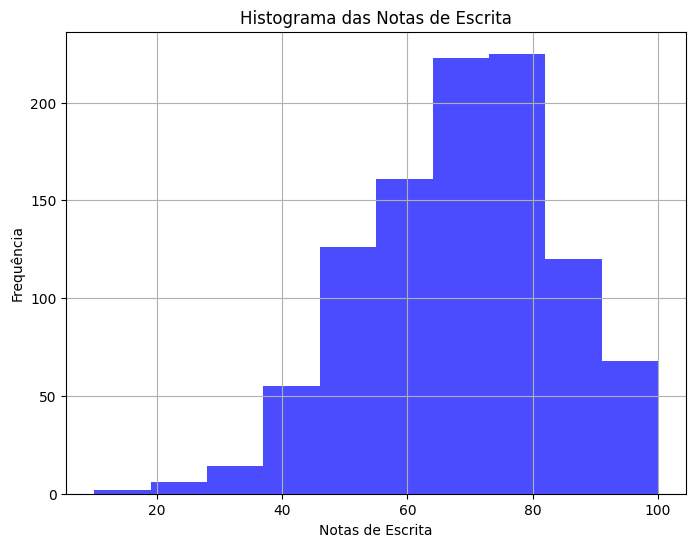

In [ ]:
#Configurando o tamanho da figura do gráfico
plt.figure(figsize=(8, 6))
#criando o histogragma
plt.hist(dados['writing score'], bins=10, color='blue', alpha=0.7)
#Configurando o título do gráfico
plt.title('Histograma das Notas de Escrita')
#Configurando o rótulo do eixo x
plt.xlabel('Notas de Escrita')
#Configurando o rótulo do eixo y
plt.ylabel('Frequência')
#Adicionando uma grade o gráfico
plt.grid(True)
#Exibindo o gráfico
plt.show()


Distribuição da frequência das notas de leitura

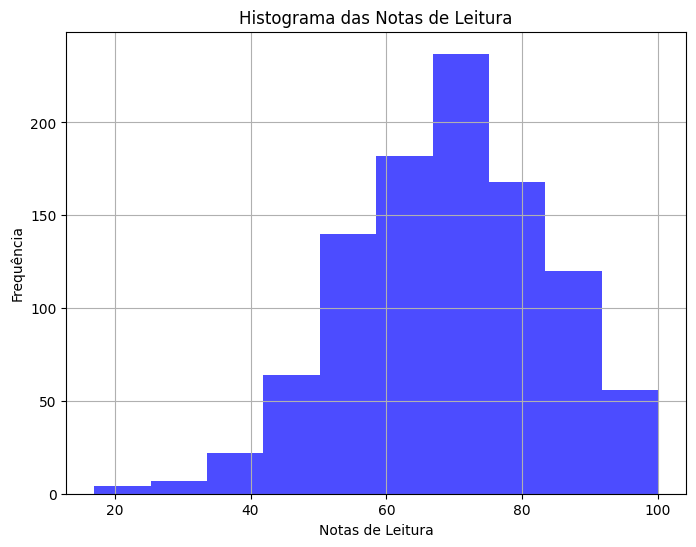

In [ ]:
#Configurando o tamanho da figura do gráfico
plt.figure(figsize=(8, 6))
#criando o histogragma
plt.hist(dados['reading score'], bins=10, color='blue', alpha=0.7)
#Configurando o título do gráfico
plt.title('Histograma das Notas de Leitura')
#Configurando o rótulo do eixo
plt.xlabel('Notas de Leitura')
#Configurando o rótulo do eixo y
plt.ylabel('Frequência')
#Adicionando uma grade o gráfico
plt.grid(True)
#Exibindo o gráfico
plt.show()

Distribuição da frequência das notas de matemática

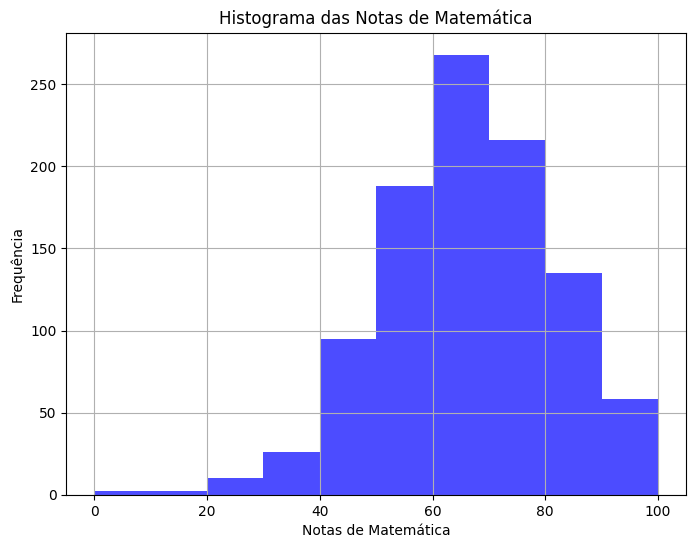

In [ ]:
#Configurando o tamanho da figura do gráfico
plt.figure(figsize=(8, 6))
#criando o histogragma
plt.hist(dados['math score'], bins=10, color='blue', alpha=0.7)
#Configurando o título do gráfico
plt.title('Histograma das Notas de Matemática')
#Configurando o rótulo do eixo x
plt.xlabel('Notas de Matemática')
#Configurando o rótulo do eixo y
plt.ylabel('Frequência')
#Adicionando uma grade o gráfico
plt.grid(True)
#Exibindo o gráfico
plt.show()

# Atividade Extra

<Axes: title={'center': 'Comparação de notas de Matemática segundo Sexo e Etnia'}, xlabel='Cor', ylabel='Nota de Matemática'>

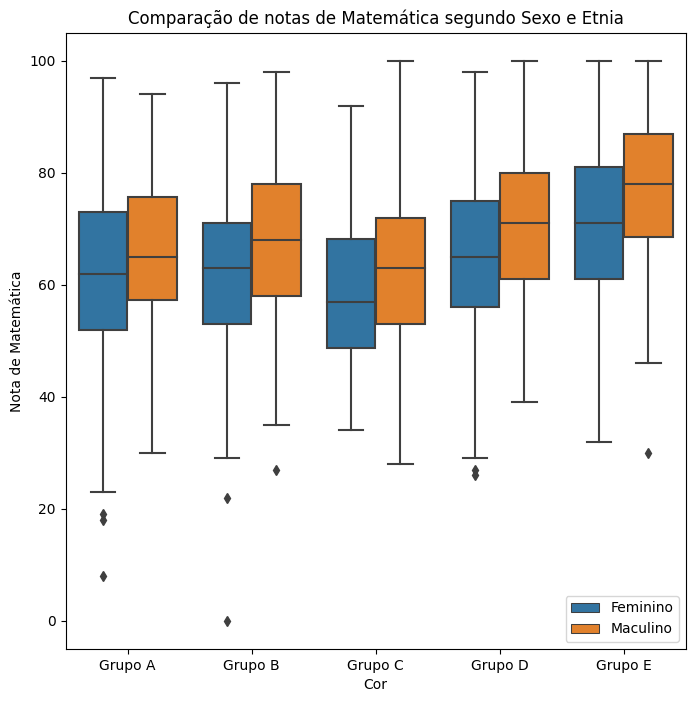

In [ ]:
ax = sns.boxplot(data=dados, x='race/ethnicity', y='math score', hue='gender')
## cria o boxplot e define as variaveis
ax.figure.set_size_inches(8, 8)
## tamanho da figura
ax.set_title('Comparação de notas de Matemática segundo Sexo e Etnia')
## altera o título
ax.set_xlabel('Cor')
## altera o nome do Eixo X
ax.set_ylabel('Nota de Matemática')
## altera o nome do Eixo Y
ax.set_xticklabels(['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E'])
## Altera os nomes dos dados do Eixo X
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Feminino','Maculino'])
## Altera os nomes na legenda
ax

<Axes: title={'center': 'Comparação de notas de Leitura segundo Sexo e Etnia'}, xlabel='Cor', ylabel='Nota de Leitura'>

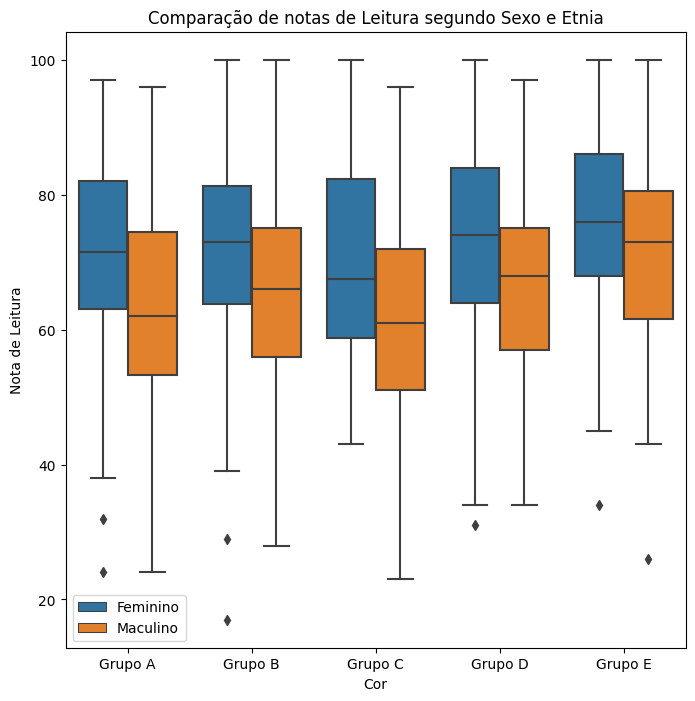

In [ ]:
ax = sns.boxplot(data=dados, x='race/ethnicity', y='reading score', hue='gender')
ax.figure.set_size_inches(8, 8)
ax.set_title('Comparação de notas de Leitura segundo Sexo e Etnia')
ax.set_xlabel('Cor')
ax.set_ylabel('Nota de Leitura')
ax.set_xticklabels(['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Feminino','Maculino'])
ax

<Axes: title={'center': 'Comparação de notas de Escrita segundo Sexo e Etnia'}, xlabel='Cor', ylabel='Nota de Escrita'>

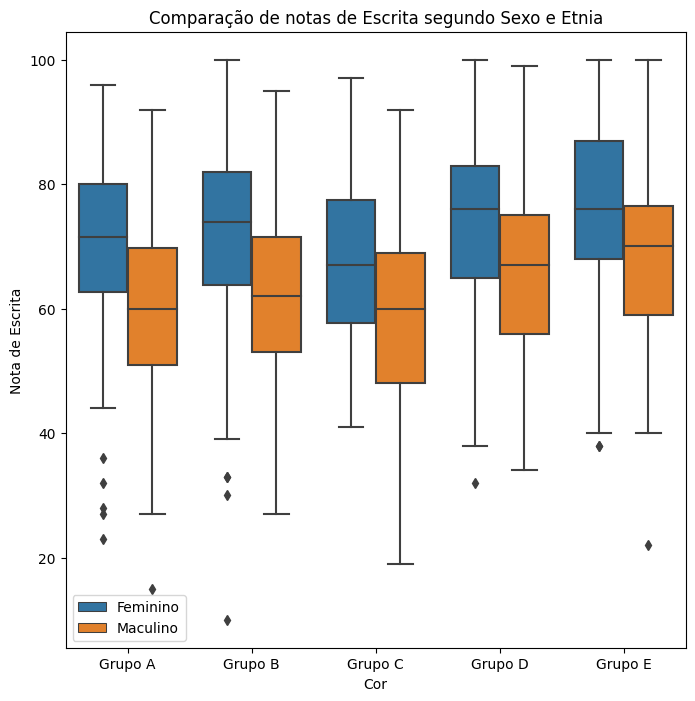

In [ ]:
ax = sns.boxplot(data=dados, x='race/ethnicity', y='writing score', hue='gender')
ax.figure.set_size_inches(8, 8)
ax.set_title('Comparação de notas de Escrita segundo Sexo e Etnia')
ax.set_xlabel('Cor')
ax.set_ylabel('Nota de Escrita')
ax.set_xticklabels(['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Feminino','Maculino'])
ax

Apesar da diferença não ser muito discrepante, é possível observar que pessoas do sexo masculino, independente da raça/etnia, tiveram desempenho melhor em matemática, e pessoas do sexo feminino tiveram melhor desempenho em leitura e escrita.

<Axes: title={'center': 'Comparação das notas de Matemática segundo o Grau de Escolaridade dos Pais'}, xlabel='Grau de Escolaridade dos Pais', ylabel='Nota de Matemática'>

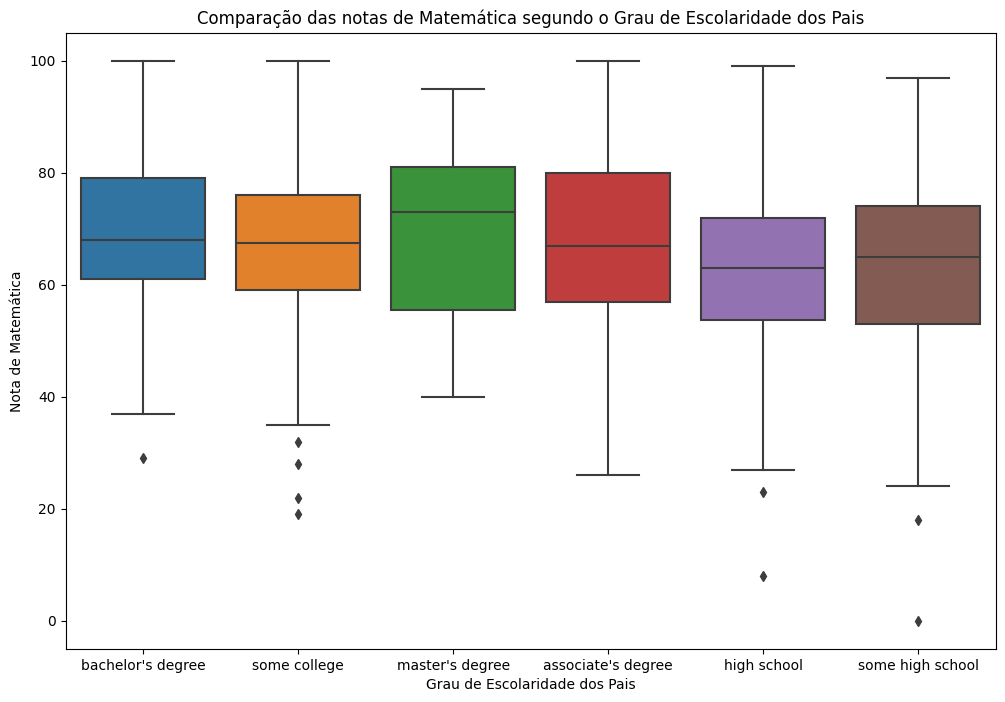

In [ ]:
ax = sns.boxplot(data=dados, x='parental level of education', y='math score')
ax.figure.set_size_inches(12, 8)
ax.set_title('Comparação das notas de Matemática segundo o Grau de Escolaridade dos Pais')
ax.set_xlabel('Grau de Escolaridade dos Pais')
ax.set_ylabel('Nota de Matemática')
ax

Com relação as notas de matemática, a diferença no desempenho não foi muito grande. Os filhos de pais que possuem mestrado tiveram a mediana de maior valor. Vale ressaltar que os dados desses alunos são assimétricos, por isso a mediana é a medida mais indicada. Os demais dados são simétricos.

<Axes: title={'center': 'Comparação das notas de Leitura segundo o Grau de Escolaridade dos Pais'}, xlabel='Grau de Ecolaridade dos Pais', ylabel='Nota de Leitura'>

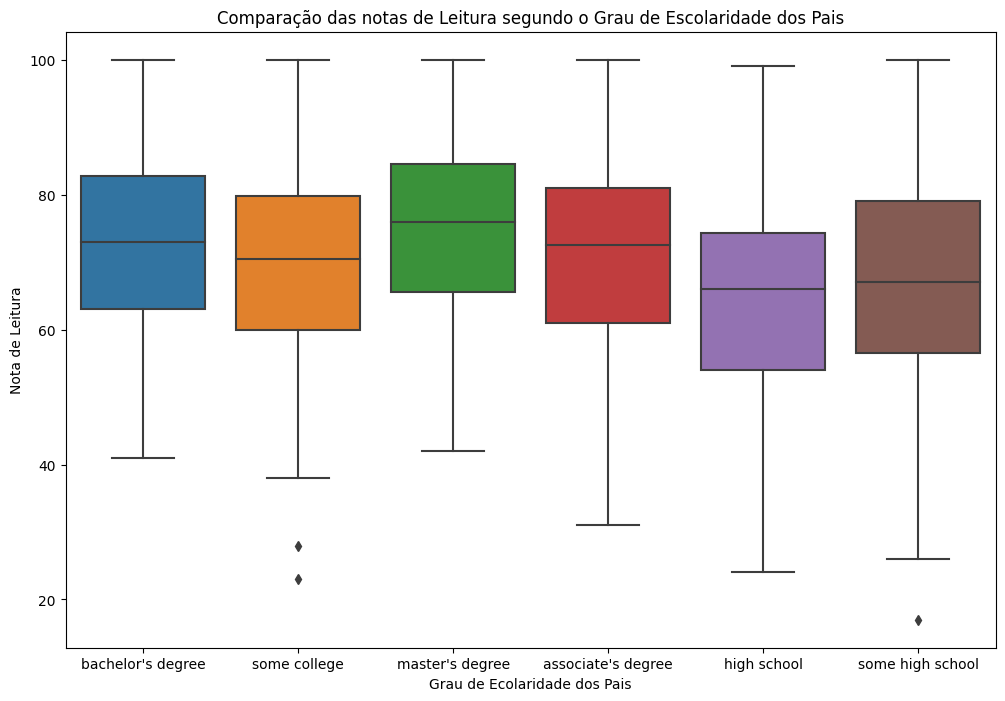

In [ ]:
ax = sns.boxplot(data=dados, x='parental level of education', y='reading score')
ax.figure.set_size_inches(12, 8)
ax.set_title('Comparação das notas de Leitura segundo o Grau de Escolaridade dos Pais')
ax.set_xlabel('Grau de Ecolaridade dos Pais')
ax.set_ylabel('Nota de Leitura')
ax

Com relação as notas de leitura, nota-se que os filhos de pais que fizeram apenas escola secundária ou ensino médio tiveram um desempenho um pouco inferior. Vemos que suas notas mínimas foram as mais baixas, bem como suas medianas. Observamos um melhor desempenho nos alunos cujo os pais possuem mestrado.

<Axes: title={'center': 'Comparação das notas de Escrita segundo o Grau de Escolaridade dos Pais'}, xlabel='Grau de Escolaridade dos Pais', ylabel='Nota de Escrita'>

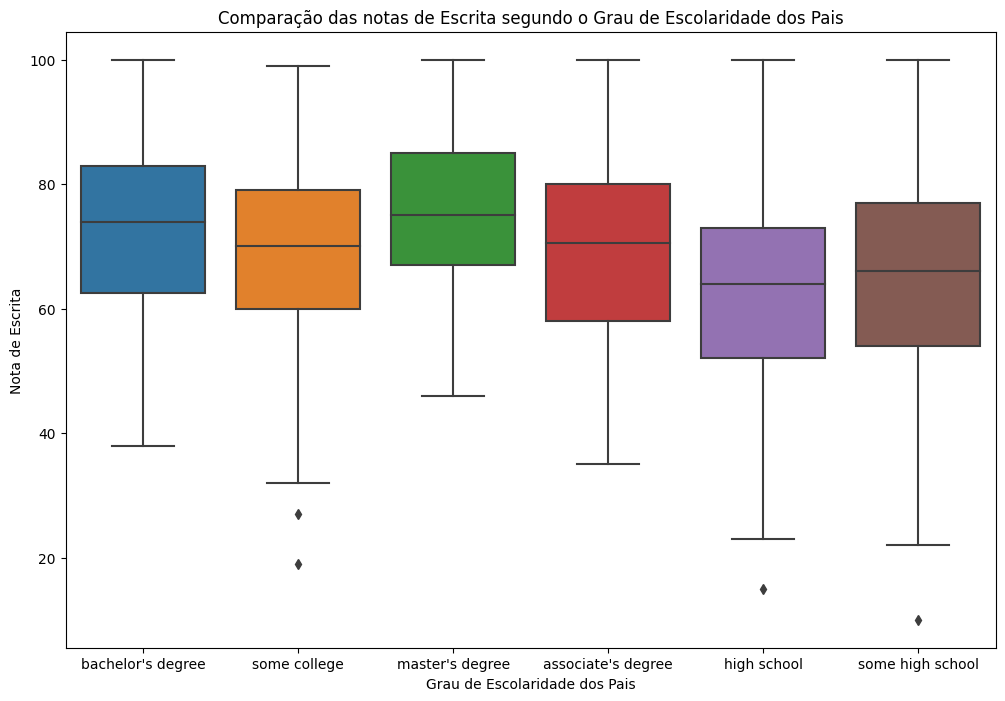

In [ ]:
ax = sns.boxplot(data=dados, x='parental level of education', y='writing score')
ax.figure.set_size_inches(12, 8)
ax.set_title('Comparação das notas de Escrita segundo o Grau de Escolaridade dos Pais')
ax.set_xlabel('Grau de Escolaridade dos Pais')
ax.set_ylabel('Nota de Escrita')
ax

As notas de escrita possuem uma tendência similar a das notas de leitura. Os filhos de pais que fizeram apenas escola secundária ou ensino médio, tiveram um desempenho um pouco inferior. Vemos que suas notas mínimas foram as mais baixas, bem como suas medianas. Observamos um melhor desempenho nos alunos, cujo os pais possuem mestrado.

<Axes: title={'center': 'Comparação das notas de Matemática segundo quem fez Curso Preparatório'}, xlabel='Teve ou não curso preparatório', ylabel='Nota de Matemática'>

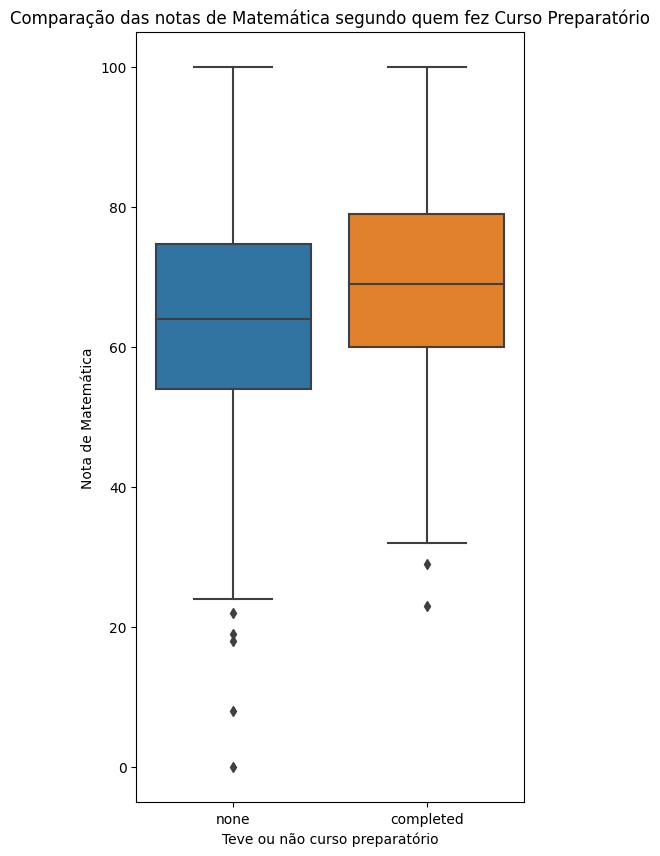

In [ ]:
ax = sns.boxplot(data=dados, x='test preparation course', y='math score')
ax.figure.set_size_inches(5, 10)
ax.set_title('Comparação das notas de Matemática segundo quem fez Curso Preparatório')
ax.set_xlabel('Teve ou não curso preparatório')
ax.set_ylabel('Nota de Matemática')
ax

<Axes: title={'center': 'Comparação das notas de Leitura segundo quem fez Curso Preparatório'}, xlabel='Teve ou não curso preparatório', ylabel='Nota de Leitura'>

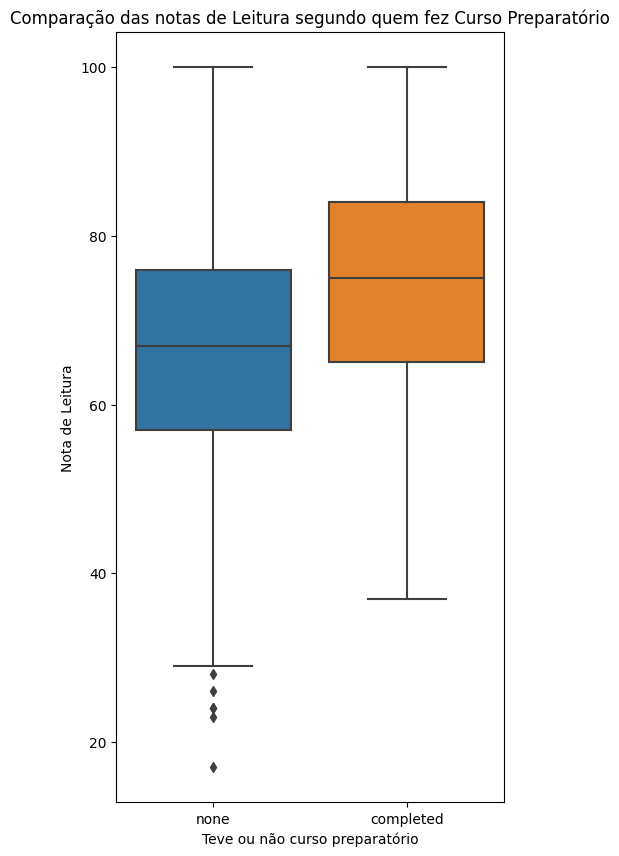

In [ ]:
ax = sns.boxplot(data=dados, x='test preparation course', y='reading score')
ax.figure.set_size_inches(5, 10)
ax.set_title('Comparação das notas de Leitura segundo quem fez Curso Preparatório')
ax.set_xlabel('Teve ou não curso preparatório')
ax.set_ylabel('Nota de Leitura')
ax

<Axes: title={'center': 'Comparação das notas de Escrita segundo quem fez Curso Preparatório'}, xlabel='Teve ou não curso preparatório', ylabel='Nota de Escrita'>

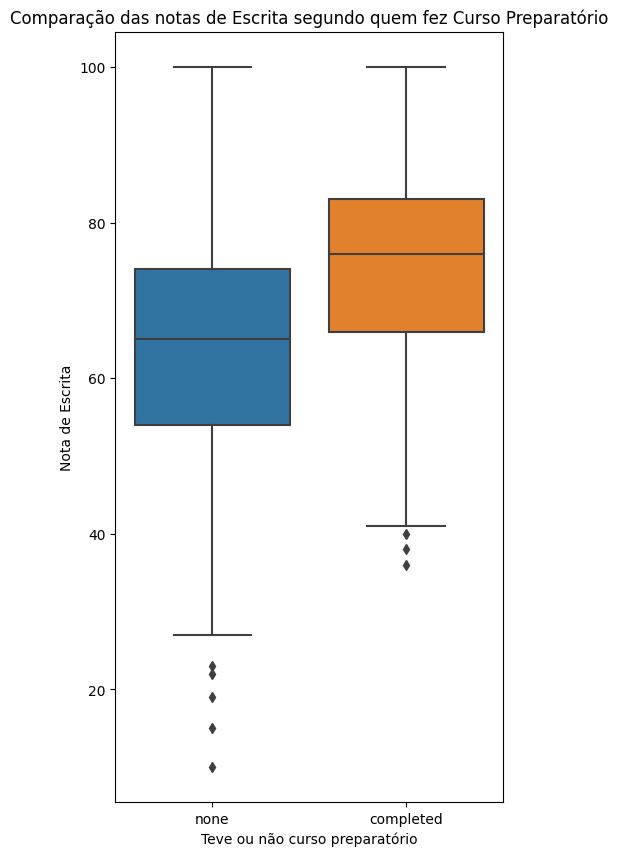

In [ ]:
ax = sns.boxplot(data=dados, x='test preparation course', y='writing score')
ax.figure.set_size_inches(5, 10)
ax.set_title('Comparação das notas de Escrita segundo quem fez Curso Preparatório')
ax.set_xlabel('Teve ou não curso preparatório')
ax.set_ylabel('Nota de Escrita')
ax

As notas de quem realizou o curso preparatório são maiores do que as de quem não realizou.